# **ANALIZA EKSPLORACYJNA DANYCH**  (EDA-IRYS)

* **Wprowadenie**

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.
Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.
Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.
Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

In [2]:
import pandas as pd
!pip install pillow
from PIL import Image, ImageOps
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Ścieżki do trzech zdjęć
paths = ['IS.jpg', 'IV.jpg', 'IVI.jpg']

# Wczytaj i zmień rozmiar zdjęć (opcjonalnie ujednolicenie rozmiaru)
images = [Image.open(p).resize((200, 200)) for p in paths]

# Dodaj ramkę do każdego zdjęcia (np. 5 pikseli, kolor czarny)
framed_images = [ImageOps.expand(img, border=5, fill='black') for img in images]

# Oblicz rozmiar finalnego obrazu
total_width = sum(img.width for img in framed_images)
max_height = max(img.height for img in framed_images)

# Stwórz nowy obraz o odpowiednich rozmiarach
combined_image = Image.new('RGB', (total_width, max_height), color='white')

# Wklej zdjęcia jedno obok drugiego
x_offset = 0
for img in framed_images:
    combined_image.paste(img, (x_offset, 0))
    x_offset += img.width

# Zapisz lub pokaż wynik
combined_image.save('połączone_zdjecia.jpg')
combined_image.show()

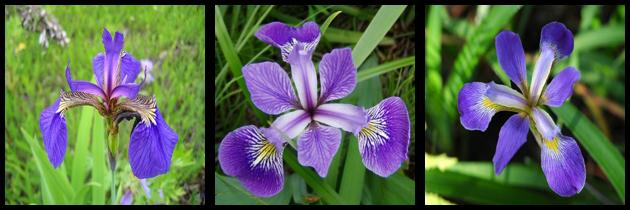

In [4]:
img = Image.open("C:\\Users\\jaros\\Desktop\\od_zera_do_ai\\__ai2\zdjecia.jpg")
display(img)  # Pokaże obraz bez otwierania nowego okna

# 1. OGÓLNY PRZEGLĄD DANYCH. #

* **Zestawienie parametrów**

In [5]:
df = pd.read_csv('iris.csv', sep=",") # wczytuje plik z danymi
df

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2. ANALIZA BRAKUJĄCYCH WARTOŚCI. #

* **Weryfikacja danych wejściowych**

In [6]:
df.info () 
# podstawowe informacje

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   długość kielicha (sepal length)   150 non-null    float64
 1   szerokość kielicha (sepal width)  150 non-null    float64
 2   długość płatka (petal length)     150 non-null    float64
 3   szerokość płatka (petal width)    150 non-null    float64
 4   klasa (class)                     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull().sum() 
# sprawdzam brakujące wartości

długość kielicha (sepal length)     0
szerokość kielicha (sepal width)    0
długość płatka (petal length)       0
szerokość płatka (petal width)      0
klasa (class)                       0
dtype: int64

In [8]:
liczba_rekordow_na_klase = df['klasa (class)'].value_counts()
print(liczba_rekordow_na_klase)
# weryfikacja liczby rekordów dla każdej klasy w kolumnie 'klasa (class)'

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: klasa (class), dtype: int64


* **Wnioski - Weryfikacja danych wejściowych**

- dane zawierają 150 rekordów w 5 kolumnach,
- brak pustych wartości,
- analizowane dane są oczekiwanego typu (float dla wartości numerycznych, object dla klas)

# 3. ANALIZA POJEDYŃCZYCH ZMIENNYCH. #

* **Analiza parametrów - porównnie kielichów kwiatów**

In [9]:
porownaj_kiel=df.groupby("klasa (class)", as_index=False).agg({
    "długość kielicha (sepal length)":["mean", "min", "max"],
    "szerokość kielicha (sepal width)":["mean", "min", "max"]}).copy()
# obliczenia dla wartości średniej, min i max dla długości i szerokości kielicha wg klasy
porownaj_kiel

klasa (class) długość kielicha (sepal length)            \
                                              mean  min  max   
0      Iris-setosa                           5.006  4.3  5.8   
1  Iris-versicolor                           5.936  4.9  7.0   
2   Iris-virginica                           6.588  4.9  7.9   

  szerokość kielicha (sepal width)            
                              mean  min  max  
0                            3.418  2.3  4.4  
1                            2.770  2.0  3.4  
2                            2.974  2.2  3.8

* **Analiza parametrów - porównnie płatków kwiatów**

In [10]:
porownaj_plat=df.groupby("klasa (class)", as_index=False).agg({
    "długość płatka (petal length)":["mean", "min", "max"],
    "szerokość płatka (petal width)":["mean", "min", "max"]}).copy()
# obliczenie wartości średniej, min i max dla długości i szerokości płatka wg klasy
porownaj_plat

klasa (class) długość płatka (petal length)            \
                                            mean  min  max   
0      Iris-setosa                         1.464  1.0  1.9   
1  Iris-versicolor                         4.260  3.0  5.1   
2   Iris-virginica                         5.552  4.5  6.9   

  szerokość płatka (petal width)            
                            mean  min  max  
0                          0.244  0.1  0.6  
1                          1.326  1.0  1.8  
2                          2.026  1.4  2.5

* **Analiza parametrów - eksploracja wizualna**

- Wykres nr 1. Histogram kielicha i platka

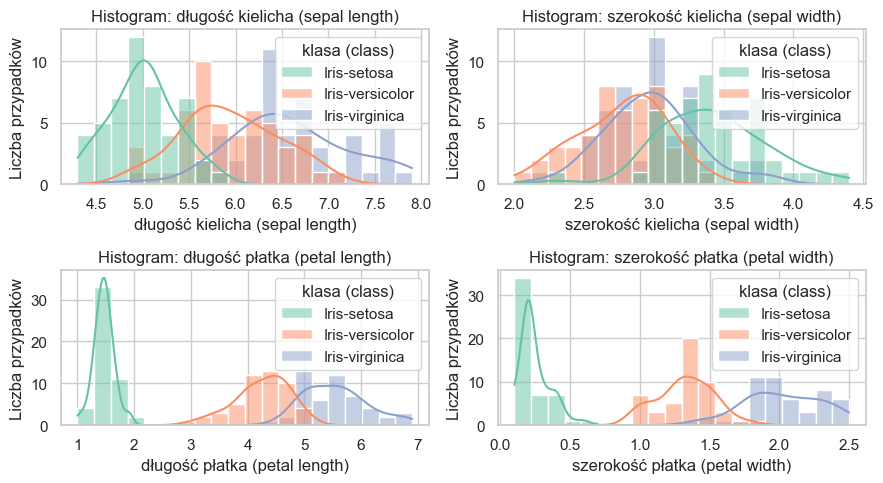

In [11]:
# Ustaw styl wykresów
sns.set(style="whitegrid")

# Lista kolumn do histogramów
kolumny = [
    "długość kielicha (sepal length)",
    "szerokość kielicha (sepal width)",
    "długość płatka (petal length)",
    "szerokość płatka (petal width)"
]

# Tworzymy siatkę 2x2 na wykresy
fig, axs = plt.subplots(2, 2, figsize=(9, 5))
axs = axs.ravel()  # Spłaszczenie tablicy osi, żeby łatwiej iterować

# Tworzenie histogramów
for i, kol in enumerate(kolumny):
    sns.histplot(data=df, x=kol, bins=20, kde=True, hue="klasa (class)", ax=axs[i], palette="Set2")
    axs[i].set_title(f"Histogram: {kol}")
    axs[i].set_xlabel(kol)
    axs[i].set_ylabel("Liczba przypadków")

plt.tight_layout()
plt.show()

# 4. ANALIZA WARTOŚCI ODSTAJĄCYCH. #

- Wykres nr 2. Boxplot kielicha i platka

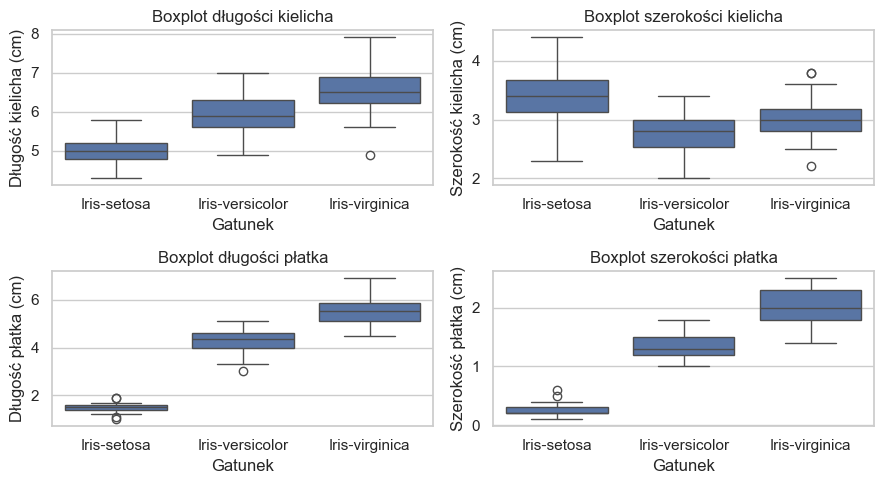

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych
data = pd.read_csv('iris.csv')

# Filtracja danych dla trzech gatunków
filtered_data = data[data['klasa (class)'].isin(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])]

# Ustawienia dla wykresów
plt.figure(figsize=(9, 5))

# Boxplot dla długości kielicha
plt.subplot(2, 2, 1)
sns.boxplot(data=filtered_data, x='klasa (class)', y='długość kielicha (sepal length)', hue=None)
plt.title('Boxplot długości kielicha')
plt.xlabel('Gatunek')
plt.ylabel('Długość kielicha (cm)')

# Boxplot dla szerokości kielicha
plt.subplot(2, 2, 2)
sns.boxplot(data=filtered_data, x='klasa (class)', y='szerokość kielicha (sepal width)', hue=None)
plt.title('Boxplot szerokości kielicha')
plt.xlabel('Gatunek')
plt.ylabel('Szerokość kielicha (cm)')

# Boxplot dla długości płatka
plt.subplot(2, 2, 3)
sns.boxplot(data=filtered_data, x='klasa (class)', y='długość płatka (petal length)', hue=None)
plt.title('Boxplot długości płatka')
plt.xlabel('Gatunek')
plt.ylabel('Długość płatka (cm)')

# Boxplot dla szerokości płatka
plt.subplot(2, 2, 4)
sns.boxplot(data=filtered_data, x='klasa (class)', y='szerokość płatka (petal width)', hue=None)
plt.title('Boxplot szerokości płatka')
plt.xlabel('Gatunek')
plt.ylabel('Szerokość płatka (cm)')

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()

# 5. ANALIZA RELACJI MIEDZY ZMIENNYMI. #

In [13]:
import seaborn as sns #import bibioteki seaborn, aby móc stworzyć wykres heatmap
numerical_df = df.drop(columns=['klasa (class)']) #wyłączenie kolumny klasa 
correlation_matrix = numerical_df.corr()

 - Wykres nr 3. Korelacja miedzy cechami

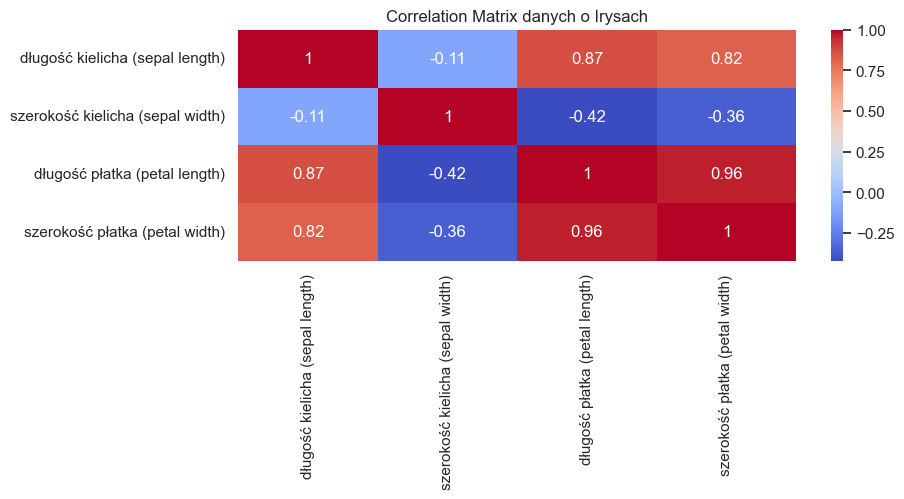

In [15]:
plt.figure(figsize=(9, 3)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix danych o Irysach')  

plt.show()

Opis wykresu: Współczynnik korelacji (r) między dwiema cechami:

r = 1 – silna korelacja dodatnia (np. cechy rosną razem),

r = -1 – silna korelacja ujemna (jedna rośnie, druga maleje),

r = 0 – brak korelacji (cechy niezależne od siebie).

- Wykres nr 4. Macierz wykresów rozrzutu (scatterplot matrix)

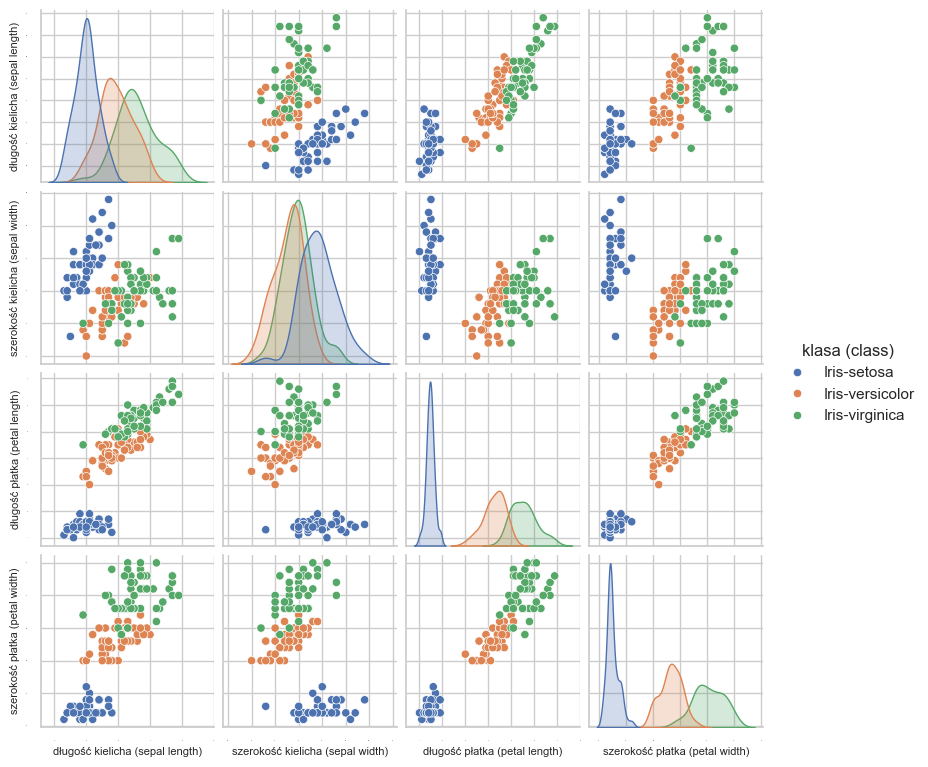

In [16]:
iris = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
size = ['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)', 'długość płatka (petal length)', 'szerokość płatka (petal width)']
klasa = 'klasa (class)'


# Stwórz pairplot z dostępem do figury
plot = sns.pairplot(df, hue="klasa (class)", height=2.0, aspect=1.0)

# Iteruj po wszystkich osiach i ustaw mniejszy rozmiar czcionki
for ax in plot.axes.flatten():
    if ax:  # sprawdź, czy oś istnieje (niektóre mogą być puste)
        ax.tick_params(labelsize=0.5)  # tutaj ustawiasz wielkość czcionki
for ax in plot.axes.flatten():
    if ax and ax.get_xlabel():
        ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    if ax and ax.get_ylabel():
        ax.set_ylabel(ax.get_ylabel(), fontsize=8)

Opis: Wykres pokazał jak klasy są rozrzucone w tych wymiarach.

Dla każdej pary cech (długość płatka vs szerokość kielicha) narysowany został wykres punktowy (scatterplot).

Na diagonali (czyli od lewej góry do prawej dolnej) pokazuje histogramy (lub KDE) każdej cechy osobno.

Dzięki hue=klasa każdy punkt jest pokolorowany zgodnie z klasą (gatunkiem) irysa — np. setosa, versicolor, virginica.

* **Wnioski - Analiza danych**


- histogramy pokazują, że takie cech jak długość i szerokość kielicha oraz płatka, mogą być używane do rozróżniania między trzema gatunkami kwiatów,
  
- wartość średniej **długości kielicha** jest: najwyższa u iris virginica a najniższa u iris setosa
- wartość  średniej **szerokości kielicha** jest: najwyższa u iris setosa a najniższa u iris versicolor
- wartość średniej **długości płatków** jest: najwyższa u iris virginica a najniższa u iris setosa
- wartość średniej **szerokości płatków** jest: najwyższa u iris virginica a najniższa u iris setosa
  
- **długość płatka** do szerokości płatka pokazuje Korelacje na poziomie 0.96, co wskazuje na bardzo silną zależność korelacji. Oznacza to że dłuższe płatki mają tendencję do bycia szerszymi.

## Konkluzje


    Analiza zawierała weryfikacje 3 gatunków irysów po 50 próbek dla każdej odmiany. Próba okazała się wystarczająco liczna dla wykazania różnic pomiedzy badanymi własciwościami kwiatów.


 - IRIS SETOSA - wyróżnia się najdrobniejszymi płatkami kwiatów oraz najszerszym kielichu,

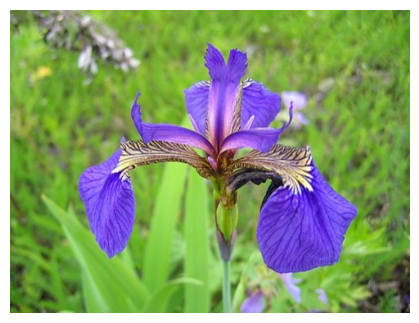

In [17]:
img = Image.open("C:\\Users\\jaros\\Desktop\\od_zera_do_ai\\__ai2\IS.jpg")

# Przelicz centymetry na cale:
szerokosc_cm = 15
wysokosc_cm = 10
figsize = (szerokosc_cm / 2.54, wysokosc_cm / 2.54)

plt.figure(figsize=figsize)
plt.imshow(img)
plt.axis('off')
plt.show()


 - IRIS VIRGINICA - posiada najwieksza długośc kielichów i najszersze, najdłuższe płatki,

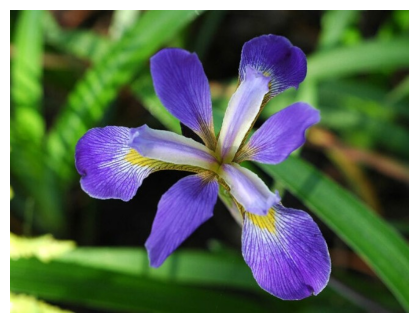

In [18]:
img = Image.open("C:\\Users\\jaros\\Desktop\\od_zera_do_ai\\__ai2\IVI.jpg")
# Przelicz centymetry na cale:
szerokosc_cm = 15
wysokosc_cm = 10
figsize = (szerokosc_cm / 2.54, wysokosc_cm / 2.54)

plt.figure(figsize=figsize)
plt.imshow(img)
plt.axis('off')
plt.show()

- IRIS VERSICOLOR - kwiat bez znaczących różnic w stosunku do VIRGINICA, najwęzszy kielich, srednia długość,  

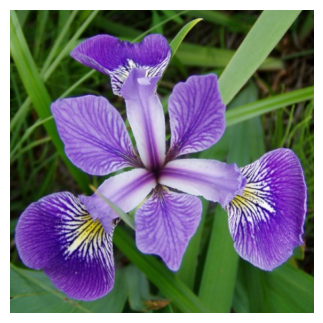

In [19]:
img = Image.open("C:\\Users\\jaros\\Desktop\\od_zera_do_ai\\__ai2\IV.jpg")
# Przelicz centymetry na cale:
szerokosc_cm = 15
wysokosc_cm = 10
figsize = (szerokosc_cm / 2.54, wysokosc_cm / 2.54)

plt.figure(figsize=figsize)
plt.imshow(img)
plt.axis('off')
plt.show()

In [21]:
!jupyter nbconvert iris.ipynb --to html --no-input --no-prompt --output iris.html

[NbConvertApp] Converting notebook iris.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 2116339 bytes to iris.html
